# Orbit model of P.A. for slit rotation

We want to place the IGRINS slit along the line connecting the two components.  Here we follow the [astrometric orbit fitting tutorial](https://docs.exoplanet.codes/en/stable/tutorials/astrometric/) in the [exoplanet](https://docs.exoplanet.codes/en/stable/) framework to determine the P.A.


In [1]:
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import exoplanet as xo

from astropy import constants

# conversion constant from au to R_sun
au_to_R_sun = (constants.au / constants.R_sun).value

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We take orbital parameters for Luhman 16 from Table 5 of [Lazorenko & Sahlmann 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...618A.111L/abstract):

| Param | Value|
|-- | -- |
|$a$ (mas)			| 1784.0|
|$a$ (AU)			| 3.557|
|$e$			      | 0.343 |
|$P$ (yr)			| 27.54|
|$T_0$ (yr)			| 2017.78|
|$i$ (deg)			| 100.26|
|$\omega$ (deg)			| 128.1|
|$\Omega$ (deg)			| 139.67|
|$M_{tot}$ ($M_{\mathrm{Jup} }$)	| 		62.06|
|$M_A$ ($M_{\mathrm{Jup} }$)		| 	33.51|
|$M_B$ ($M_{\mathrm{Jup} }$)		| 	28.55|

In [3]:
parallax = 501.557 # mas

In [4]:
a = (3.557 * u.AU).to(u.Rsun).value
e = 0.343
i = 100.26 * np.pi / 180  # [rad]
omega = 128.1 * np.pi / 180  # Pourbaix reports omega_2, but we want omega_1
Omega = 139.67 * np.pi / 180
P = 27.54 * 365.25  # days

T0_orig = Time(2017.78, format="decimalyear")
T0_orig.format = "jd"
T0 = T0_orig.value  # [Julian Date]

In [5]:
# instantiate the orbit
orbit = xo.orbits.KeplerianOrbit(
    a=a, t_periastron=T0, incl=i, ecc=e, omega=omega, Omega=Omega, 
    m_planet=0.027, m_star=0.032, m_planet_units=u.Msun, r_star = 0.10045
)

In [6]:
import theano
import theano.tensor as tt

In [7]:
t_arr = ( T0_orig - P/2*u.day) + np.linspace(0*u.day, P*u.day, num=200)  # days

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 41 of "dubious year (Note 4)"
  ErfaWarning)


In [8]:
t = np.linspace(T0 - P/2, T0 + P/2, num=200)  # days
rho, theta = theano.function([], orbit.get_relative_angles(t, parallax))()

In [9]:
current_jd = Time.now().jd
current_decyear = Time.now().decimalyear

In [10]:
rho_now, theta_now = theano.function([], orbit.get_relative_angles(current_jd, parallax))()

In [11]:
Thst_i = Time(2014.64, format="decimalyear").jd
Thst_f = Time(2016.76, format="decimalyear").jd

In [12]:
t_hst = np.linspace(Thst_i,Thst_f, num=200)  # days
rho_hst, theta_hst = theano.function([], orbit.get_relative_angles(t_hst, parallax))()

In [16]:
import seaborn as sns

In [17]:
sns.set_style('darkgrid')
sns.set_context('talk')

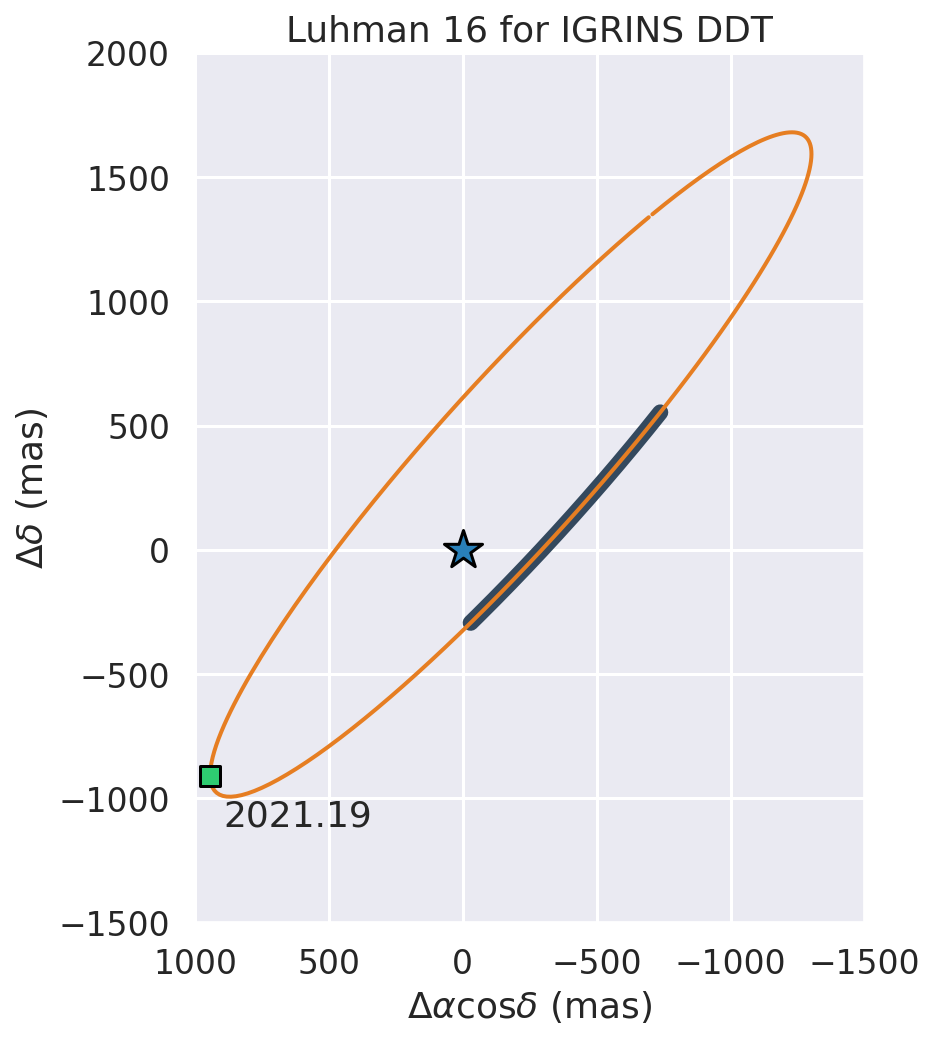

In [18]:
# Plot the orbit
fig, ax = plt.subplots(nrows=1, figsize=(6, 8))

xs = rho * np.cos(theta)  # X is north
ys = rho * np.sin(theta)  # Y is east
plt.scatter([0], [0], marker='*', s=400, c='#2980b9', ec='k')
ax.plot(ys, xs, lw=2, color='#e67e22')



xnow = rho_now * np.cos(theta_now)  # X is north
ynow = rho_now * np.sin(theta_now)  # Y is east

xhst = rho_hst * np.cos(theta_hst)  # X is north
yhst = rho_hst * np.sin(theta_hst)  # Y is east

ax.plot(yhst, xhst, lw=8, color='#34495e', zorder=1)


label = '{:0.2f}'.format(current_decyear)
plt.scatter([ynow], [xnow], marker='s', s=100, c='#2ecc71', ec='k', 
            label = label, zorder=10)

plt.text(ynow-50, xnow-200, label)

plt.ylim(-1500, 2000)
plt.xlim(1000, -1500)
plt.xlabel(r'$\Delta \alpha \cos \delta$ (mas)')
plt.ylabel(r'$\Delta \delta $ (mas)')
plt.title('Luhman 16 for IGRINS DDT')
plt.savefig('../figures/Luhman16_orbit_demo.png', bbox_inches='tight', dpi=300)

What are the separation and PA right now?

In [19]:
rho_now

array(1311.3949648)

In [20]:
theta_now * 180/np.pi

133.98902460878367

## Position on the sky

In [21]:
Dt_arr = t_arr - t_arr[0]  # days

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 41 of "dubious year (Note 3)"
  ErfaWarning)


In [22]:
Dt_arr.to(u.year)

<Quantity [ 0.        ,  0.13839196,  0.27678392,  0.41517588,  0.55356784,
            0.6919598 ,  0.83035176,  0.96874372,  1.10713568,  1.24552764,
            1.3839196 ,  1.52231156,  1.66070352,  1.79909548,  1.93748744,
            2.0758794 ,  2.21427136,  2.35266332,  2.49105528,  2.62944724,
            2.7678392 ,  2.90623116,  3.04462312,  3.18301508,  3.32140704,
            3.45979899,  3.59819095,  3.73658291,  3.87497487,  4.01336683,
            4.15175879,  4.29015075,  4.42854271,  4.56693467,  4.70532663,
            4.84371859,  4.98211055,  5.12050251,  5.25889447,  5.39728643,
            5.53567839,  5.67407035,  5.81246231,  5.95085427,  6.08924623,
            6.22763819,  6.36603015,  6.50442211,  6.64281407,  6.78120603,
            6.91959799,  7.05798995,  7.19638191,  7.33477387,  7.47316583,
            7.61155779,  7.74994975,  7.88834171,  8.02673367,  8.16512563,
            8.30351759,  8.44190955,  8.58030151,  8.71869347,  8.85708543,
            

In [23]:
compA_coords = theano.function([], orbit.get_star_position(t, parallax))()
compB_coords = theano.function([], orbit.get_planet_position(t, parallax))()

In [24]:
xA, yA, zA = compA_coords
xB, yB, zB = compB_coords

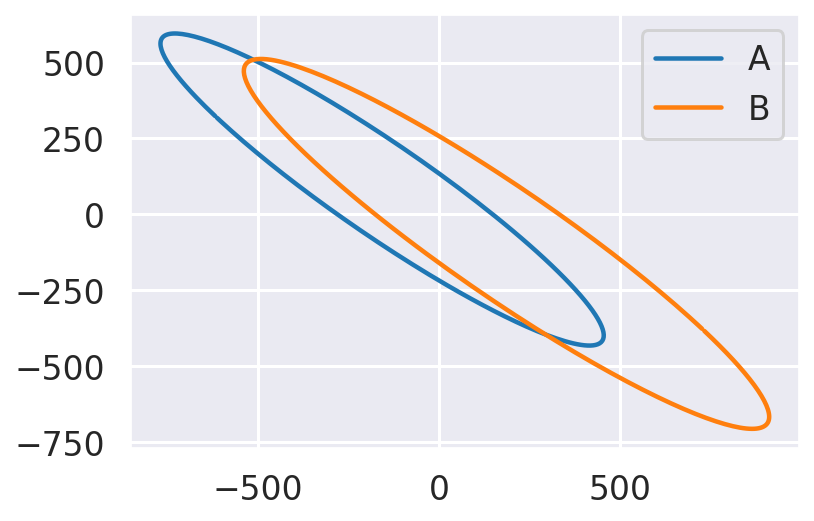

In [27]:
plt.plot(xA, yA, label='A')
plt.plot(xB, yB, label='B')
plt.legend();

Let's verify the orientation and enter that info in the DDT observing note so the observers can label each component accurately.